In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import csv

In [2]:
data_1 = pd.read_csv('/home/shreevidya/Data/combined_cleaned.csv')

In [3]:
data_1.head()

,FromDate,PM,Temp,RH,BP,WS,WD
0,01-07-2018 00:00,16.75,24.18,77.39,1022.10,0.43,224.88
1,01-07-2018 01:00,21.00,23.94,78.98,1022.48,0.64,217.85
2,01-07-2018 02:00,19.50,23.75,80.74,1022.90,0.61,224.73
3,01-07-2018 03:00,25.25,23.59,81.87,1023.20,0.49,225.78
4,01-07-2018 04:00,31.00,23.47,81.64,1023.17,0.48,240.66


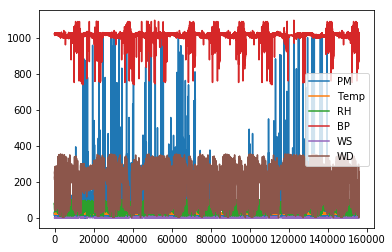

In [4]:
data_1.plot()

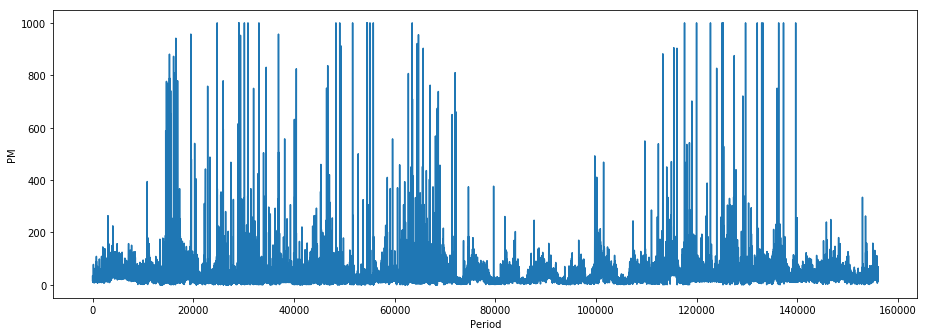

In [5]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(data_1['PM']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('PM')
#plt.title('String Title Here')
plt.show()

/home/shreevidya/anaconda3/envs/tfv2/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


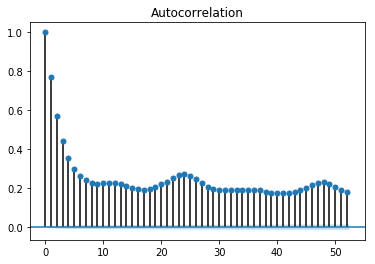

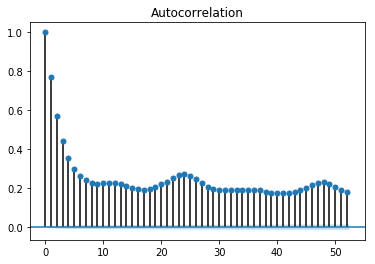

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_1['PM'])

In [7]:
len(data_1)

156046

In [8]:
X = data_1['PM']


In [9]:
train , test = X.values[:40000], X.values[40000:]

In [10]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [11]:
model = AR(train)
model_fit = model.fit(maxlag=1)
window = model_fit.k_ar
coef = model_fit.params

In [12]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)

In [13]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 602.889


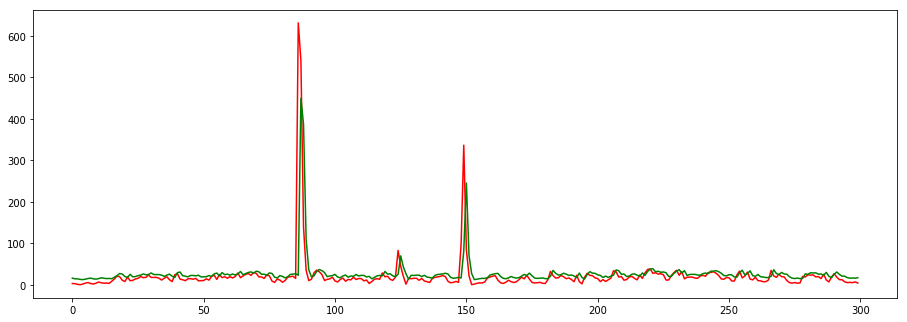

In [14]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(test[:300], color='red')
plt.plot(predictions[:300], color='green')
plt.show()

In [15]:
data_2 = pd.read_csv('/home/shreevidya/Data/final/combined_cleaned.csv')

In [16]:
data_2.dropna(inplace=True)

In [17]:
data_2.head()

,FromDate,PM,Temp,RH,BP,WS,WD
0,01-07-2018 00:00,16.75,24.18,77.39,1022.10,0.43,224.88
1,01-07-2018 01:00,21.00,23.94,78.98,1022.48,0.64,217.85
2,01-07-2018 02:00,19.50,23.75,80.74,1022.90,0.61,224.73
3,01-07-2018 03:00,25.25,23.59,81.87,1023.20,0.49,225.78
4,01-07-2018 04:00,31.00,23.47,81.64,1023.17,0.48,240.66


In [18]:
#df.rename(columns={'PM2.5':'PM'}, inplace=True)


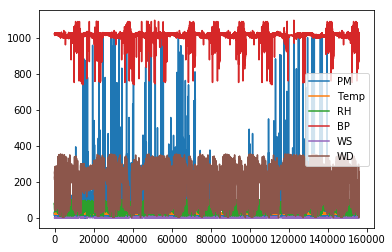

In [19]:
data_2.plot()

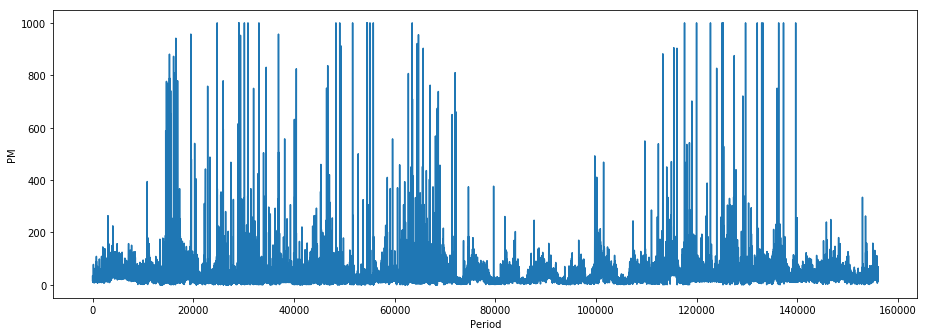

In [20]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(data_2['PM']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('PM')
#plt.title('String Title Here')
plt.show()

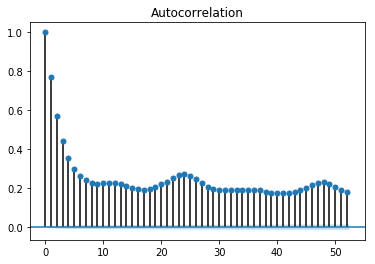

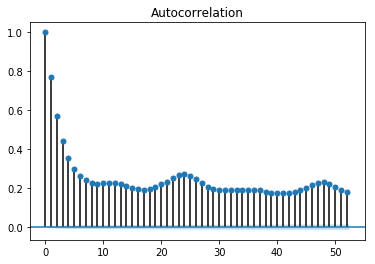

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_2['PM'])

In [22]:
len(data_2)

156046

In [23]:
X = data_2['PM']

In [24]:
train , test = X.values[:40000], X.values[40000:]

In [25]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [26]:
test

array([ 3.01,  2.85,  1.03, ..., 51.5 , 46.  , 41.  ])

In [27]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)


In [28]:
for i in range(10):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=13.364801, expected=3.010000
predicted=11.511649, expected=2.850000
predicted=12.330243, expected=1.030000
predicted=10.700076, expected=0.250000
predicted=9.538090, expected=1.910000
predicted=10.600036, expected=4.190000
predicted=10.994831, expected=5.420000
predicted=9.674717, expected=3.020000
predicted=9.013798, expected=1.920000
predicted=7.978481, expected=3.790000


In [29]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 600.646


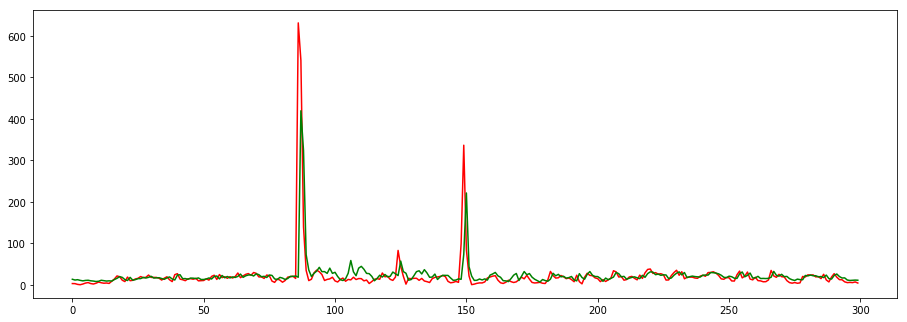

In [30]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(test[:300], color='red')
plt.plot(predictions[:300], color='green')
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

In [32]:
test_stationarity(Target.PM) 

NameError: name 'Target' is not defined

In [ ]:
#Eliminate trend : Using Weighted moving average


In [ ]:
Weighted_moving_avg = pd.ewma(Target.PM, halflife=12)
plt.plot(Target.PM)
plt.plot(Weighted_moving_avg, color='green')